# Práctica 2: Introducción a PyTorch

## a) Calculando el gradiente mediante Autograd

En primer lugar, vamos a calcular del gradiente para el perceptrón simple con función de activación sigmoidea que vimos en la teoría. Pero esta vez, en lugar de realizar manualmente el proceso de backpropagation, vamos a usar el módulo `autograd` de PyTorch.

La función $f(x, w)$ a la cual queremos encontrarle el gradiente es:

> $f(\mathbf{x}, \mathbf{w}) = \frac{1}{1 + e^{-(w_0 x_0 + w_1 x_1 + w_2)}}$

Definimos entonces la función utilizando `torch.tensor` (recordar usar el parámetro `requires_grad = True` para que PyTorch guarde los gradientes) y realizamos la pasada "forward" para los siguientes valores de x y w:

> $\mathbf{x} = (-1, -2)$

> $\mathbf{w} = (2, -3, -3)$



In [ ]:
import torch

x = torch.tensor([-1.0,-2.0],requires_grad = True)
w = torch.tensor([2.0,-3.0,-3.0],requires_grad = True)

f = 1/(1+torch.exp(-(w[0]*x[0]+w[1]*x[1]+w[2])))

print(f)


tensor(0.7311, grad_fn=<MulBackward0>)


Ahora, utilizando la función `f.backward()` computamos los gradientes $\frac{\partial f}{ \partial \mathbf{x}}$ y $\frac{\partial f}{ \partial \mathbf{w}}$

In [ ]:
f.backward()

In [ ]:
print("Gradiente df/dx = " + str(x.grad))
print("Gradiente df/dw = " + str(w.grad))

Gradiente df/dx = tensor([ 0.3932, -0.5898])
Gradiente df/dw = tensor([-0.1966, -0.3932,  0.1966])


## b) Minimizando una función con Gradient Descent

Ahora, vamos a implementar usar el algorítmo de gradiente descendiente (utilizando Autograd para computar el gradiente) para minimizar la función cuadrática $$f(x) = 2x^2 + x + 4$$

Utilizaremos la implementación `torch.optim.SGD` de gradiente descendiente.



X = tensor([0.], requires_grad=True), f(x) = tensor([4.], grad_fn=<AddBackward0>)
X = tensor([-0.0010], requires_grad=True), f(x) = tensor([3.9990], grad_fn=<AddBackward0>)
X = tensor([-0.0020], requires_grad=True), f(x) = tensor([3.9980], grad_fn=<AddBackward0>)
X = tensor([-0.0030], requires_grad=True), f(x) = tensor([3.9970], grad_fn=<AddBackward0>)
X = tensor([-0.0040], requires_grad=True), f(x) = tensor([3.9961], grad_fn=<AddBackward0>)
X = tensor([-0.0050], requires_grad=True), f(x) = tensor([3.9951], grad_fn=<AddBackward0>)
X = tensor([-0.0059], requires_grad=True), f(x) = tensor([3.9941], grad_fn=<AddBackward0>)
X = tensor([-0.0069], requires_grad=True), f(x) = tensor([3.9932], grad_fn=<AddBackward0>)
X = tensor([-0.0079], requires_grad=True), f(x) = tensor([3.9922], grad_fn=<AddBackward0>)
X = tensor([-0.0089], requires_grad=True), f(x) = tensor([3.9913], grad_fn=<AddBackward0>)
X = tensor([-0.0098], requires_grad=True), f(x) = tensor([3.9904], grad_fn=<AddBackward0>)
X = tens

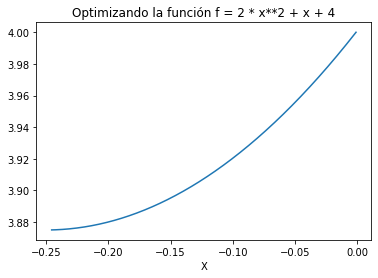

In [ ]:
import matplotlib.pyplot as plt

# Definir la variable que será el parámetro a optimizar
x = torch.tensor([0.],requires_grad=True)

# Definir el optimizador, indicando el parámetro a optimizar y el learning rate
optimizer = torch.optim.SGD([x],lr=1e-3)

# Acumuladores que usaremos para guardar los valores sucesivos de x, y
f_values = []
x_values = []

# Loop de optimización
for i in range(1000):

    # Setemos en 0 los gradientes de todos los elementos
    optimizer.zero_grad()
       
    # Pasada forward: ejecutar la función a minimizar
    f = 2*(x**2)+x+4

    print("X = " + str(x) + ", f(x) = " + str(f))

    # Pasada backward: computar los gradientes
    f.backward()

    # Actualizar los pesos dando un paso de gradiente descendiente
    optimizer.step()

    # Guardar los valores para luego plotearlos
    f_values.append(f.data.item())
    x_values.append(x.data.item())

# Ploteo los valores
plt.title("Optimizando la función f = 2 * x**2 + x + 4")
plt.xlabel("X")
plt.plot(x_values,f_values)


# c) Implementando un MLP en PyTorch para predicción de precios de inmuebles 

Contamos con una base de datos de 506 precios de inmuebles de la ciudad de Boston [1]. Cada inmueble está descripto por diversas características como el indice de crimen per capita en la zona, o el grado de accesibilidad a autopistas, etc. Se cuenta con el precio de cada uno, y se pretende desarrollar un módulo que permita predecir dicho precio a partir de las características.

[1]: *Hedonic prices and the demand for clean air*, J. Environ. Economics & Management, vol.5, 81-102, 1978.

Primero, vamos a generar un histograma de los precios con todos los datos disponibles:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

El dataset contiene dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module']) 


Fila de ejemplo:
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]


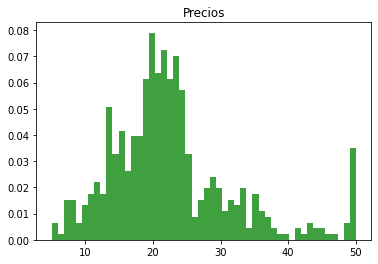

In [ ]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np

# Importamos el dataset

dataset_boston = load_boston()

print("El dataset contiene " + str(dataset_boston.keys()) + " \n\n")

# Extraigo los datos (features) y los precios (etiquetas a predecir)
data = dataset_boston['data']
data = data.astype(np.float32)
precios = np.expand_dims(dataset_boston['target'], axis=1).astype(np.float32)

print("Fila de ejemplo:")
print(dataset_boston['feature_names'])
print(data[0,:])

# Dibujo un histograma de los precios de los inmuebles
_ = plt.hist(precios, 50, density=True, facecolor='g', alpha=0.75)
_ = plt.title("Precios")


Particionamos los datos en entrenamiento y prueba usando la función `sklearn.model_selection.train_test_split`

In [ ]:
 from sklearn.model_selection import train_test_split
 
 # Particiono los datos en entrenamiento y prueba usando el método de scikitlearn
 X_train, X_test, y_train, y_test = train_test_split(data, precios , test_size=0.33, random_state=42)
 #print(y_train)

Ahora implementaremos un Perceptrón multicapa que usaremos para como regresor del precio utilizando PyTorch (ejemplo basado en el curso de [RPI](https://rpi.analyticsdojo.com/)).

El perceptrón deberá contar con 3 capas:
- Las dos primeras con 100 neuronas, y deberán usar la función de activación ReLU.
- La última con una única neurona cuya salida sea un valor escalar que corresponda al precio estimado del inmueble, que no deberá utilizar ninguna función de activación.

Algunas clases de PyTorch que resultarán útiles para implementar el modelo, son:
- `torch.nn.Linear`: Implementa una capa totalmente conectada. Es necesario especificarle el número de parámetros de entrada y de salida.
- `torch.nn.functional.relu`: Implementa la función de activación ReLU.

Además, utilizaremos el optimizador `torch.optim.Adam` y la función de pérdida `torch.nn.MSELoss` (error cuadrático medio).






13


/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Epoch 100, loss = 1365.27
Epoch 200, loss = 763.447
Epoch 300, loss = 1538.33
Epoch 400, loss = 574.221
Epoch 500, loss = 1582.65
Epoch 600, loss = 579.222
Epoch 700, loss = 545.646
Epoch 800, loss = 1020.08
Epoch 900, loss = 1039.24
Epoch 1000, loss = 279.805
Epoch 1100, loss = 800.771
Epoch 1200, loss = 1081.06
Epoch 1300, loss = 610.339
Epoch 1400, loss = 931.48
Epoch 1500, loss = 353.129
Epoch 1600, loss = 379.394
Epoch 1700, loss = 698.019
Epoch 1800, loss = 536.517
Epoch 1900, loss = 657.803
Epoch 2000, loss = 155.141
Epoch 2100, loss = 464.653
Epoch 2200, loss = 664.954
Epoch 2300, loss = 227.531
Epoch 2400, loss = 458.429
Epoch 2500, loss = 277.408
Epoch 2600, loss = 385.53
Epoch 2700, loss = 295.455
Epoch 2800, loss = 431.136
Epoch 2900, loss = 259.211
Epoch 3000, loss = 371.53
Epoch 3100, loss = 215.734
Epoch 3200, loss = 249.423
Epoch 3300, loss = 133.371
Epoch 3400, loss = 226.393
Epoch 3500, loss = 523.437
Epoch 3600, loss = 228.178
Epoch 3700, loss = 210.267
Epoch 3800, l

Text(0.5, 1.0, 'Función de pérdida durante el entrenamiento')

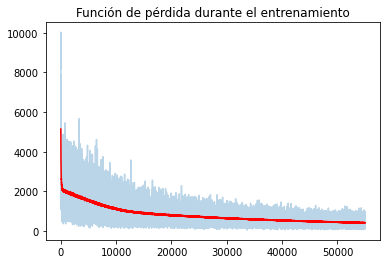

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

# Tamaño del batch de entrenamiento
batch_size = 50

# Tasa de aprendizaje inicial para el gradiente descendente
learning_rate = 0.00001
cols = X_train.shape[1]
print(cols)

class Net(torch.nn.Module):
    def __init__(self, input_features, size_hidden, n_output):
        super(Net, self).__init__()
        self.hidden1 = nn.Linear(cols,size_hidden)
        self.hidden2 = nn.Linear(size_hidden,size_hidden)
        self.out = nn.Linear(size_hidden,n_output)

    def forward(self, x):
        x = F.relu(self.hidden1(x))      # activation function for hidden layer 1
        x = F.relu(self.hidden2(x))      # activation function for hidden layer 2
        x = self.out(x)                  # linear output
        return x

# Definimos el modelo del perceptrón
net = Net( cols , 200 , 1)

# Construimos el optimizador, y le indicamos que los parámetros a optimizar 
# son los del modelo definido: net.parameters()

optimizer = torch.optim.Adam( net.parameters() , lr=learning_rate)

# Definimos también la función de pérdida a utilizar
criterion = torch.nn.MSELoss(size_average=False)

# Creamos el objeto dataset que empaqueta los array de numpy para que puedan 
# ser leidos por PyTorch
dataset = TensorDataset(torch.from_numpy(X_train).clone(), torch.from_numpy(y_train).clone())

# Creamos un loader iterable indicandole que debe leer los datos a partir de
# del dataset creado en el paso anterior. Este objeto puede ser iterado
# y nos devuelve de a un batch (x, y).
loader = DataLoader(dataset=dataset, batch_size=32, shuffle=True)

# Número de épocas
num_epochs = 5000

# Lista en la que iremos guardando el valor de la función de pérdida en cada 
# etapa de entrenamiento
loss_list = []

# Bucle de entrenamiento
for i in range(num_epochs):

    # Itero sobre todos los batches del dataset
    for x, y in loader:
        # Seteo en cero los gradientes de los parámetros a optimizar
        optimizer.zero_grad()

        # Realizo la pasada forward computando la loss entre la salida de la red `net(x)` y las etiquetas `y`
        loss = criterion(net(x),y)
        
        # Realizo la pasada backward por la red        
        loss.backward()
        
        # Actualizo los pesos de la red con el optimizador
        optimizer.step()

        # Me guardo el valor actual de la función de pérdida para luego graficarlo
        loss_list.append(loss.data.item())

    # Muestro el valor de la función de pérdida cada 100 iteraciones        
    if i > 0 and i % 100 == 0:
        print('Epoch %d, loss = %g' % (i, loss))

# Muestro la lista que contiene los valores de la función de pérdida
# y una versión suavizada (rojo) para observar la tendencia
plt.figure()
loss_np_array = np.array(loss_list)
plt.plot(loss_np_array, alpha = 0.3)
N = 60
running_avg_loss = np.convolve(loss_np_array, np.ones((N,))/N, mode='valid')
plt.plot(running_avg_loss, color='red')
plt.title("Función de pérdida durante el entrenamiento")


MSE medio en training: 13.549909
MSE medio en test: 18.326933


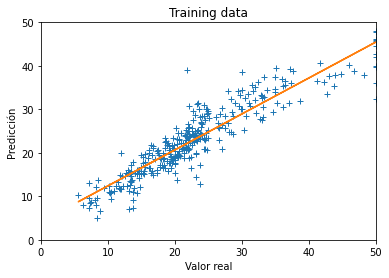

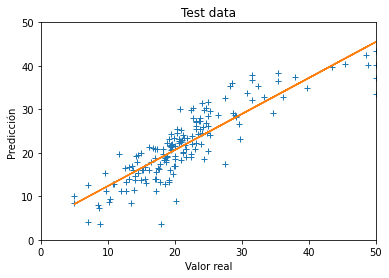

In [ ]:
from sklearn.linear_model import LinearRegression
from numpy.linalg import norm

# Definimos un método para mostrar las predicciones como un scatter plot 
# y graficamos la recta de regresión para esos datos.

def plotScatter(x_data, y_data, title, fit_line=True):
  plt.figure()
  
  plt.plot(x_data, y_data, '+')
  plt.xlabel('Valor real')
  plt.ylabel('Predicción')
  plt.ylim((0,50))
  plt.xlim((0,50))
  plt.title(title)

  if fit_line:
    X, Y = x_data.reshape(-1,1), y_data.reshape(-1,1)
    plt.plot( X, LinearRegression().fit(X, Y).predict(X) )

# Dibujamos el ground truth vs las predicciones en los datos de entrenamiento
py = net(torch.FloatTensor(X_train))
y_pred_train = py.cpu().detach().numpy()
plotScatter(y_train, y_pred_train, "Training data")

# Dibujamos el ground truth vs las predicciones en los datos de test
py = net(torch.FloatTensor(X_test))
y_pred_test = py.cpu().detach().numpy()
plotScatter(y_test, y_pred_test, "Test data")

print ("MSE medio en training: " + str(((y_train - y_pred_train)**2).mean()))
print ("MSE medio en test: " + str(((y_test - y_pred_test)**2).mean()))


# Entregable 
1. Encontrar el mínimo de la función *f* definida en el apartado b). Para ello, deberán encontrar primero la derivada *f'(x)* de forma analítica, y utilizarla para computar el mínimo de la función. Posteriormente, deberán corrobarar que el valor coincida con el que obtuvieron optimizando la función con gradiente descendiente. 

2. Compara el rendimiento de 3 perceptrones multicapa que varíen en la cantidad de neuronas en sus capas intermedia. Probar colocando 2, 10 y 200 neuronas en dichas capas, al entrenar los perceptrones durante 5000 épocas. Mostrar los resultados utilizando:

* los gráficos de dispersión con la recta de regresión
* el error medio en los datos de entrenamiento y test

  Analizar la relación entre dichos resultados y la cantidad de neuronas que posee el perceptrón.
 

#1.
Para minimizar la función cuadrática se debe derivar y buscar el valor de x tal que ***f'(x)* = 0** (dada la convexidad de la funcion) $$f(x) = 2x^2 + x + 4$$


Derivando e igualando a 0 se obtiene: $$f'(x) = 4x + 1 $$ $$x = -1/4 $$
Luego evaluando la funcion en el punto obtenemos:$$f(-1/4) = 2(-1/4)^2 -1/4 + 4 = 3.875$$

El cual coincide con el con el valor calculado por medio del gradiente descendente, que aproxima al mismo valor: 

X = tensor([-0.2454], requires_grad=True), f(x) = tensor([3.8750], grad_fn=<AddBackward0>)


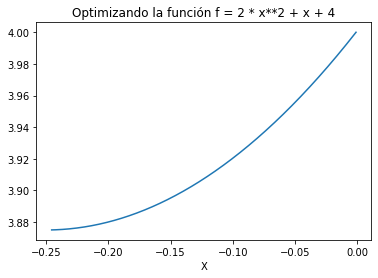


#2.
**Con 2 Neuronas:**

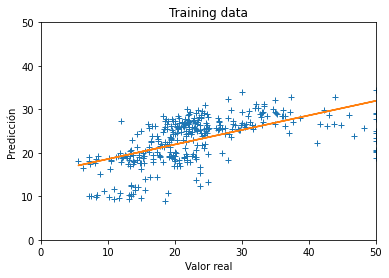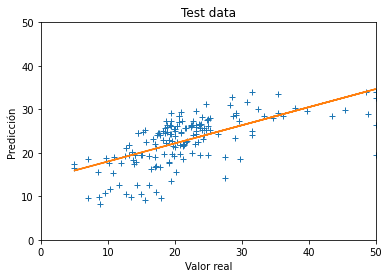

MSE medio en training: 58.770515
MSE medio en test: 46.12403

Se puede observar que si bien la recta de la regresion es capaz de ajustar bastante bien a algunos datos, hay otros en donde no sucede esto. Hay un ligero underfit que se puede mejorar con un modelo un poco mas complejo. Se espera que con mas neuronas este ajuste sea mejor, incrementando la cantidad de neuronas el modelo es capaz de afinar su capacidad de ajuste.

**Con 10 Neuronas:**

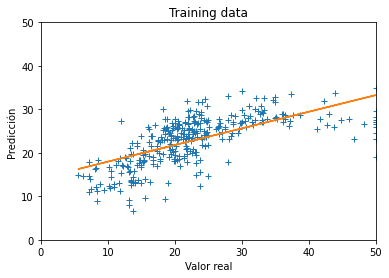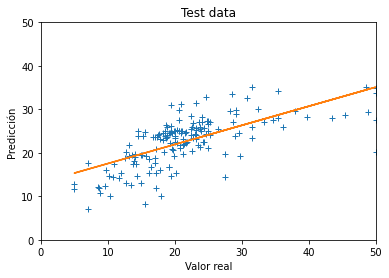

MSE medio en training: 51.191147
MSE medio en test: 42.03467

Con el modelo con 10 Neuronas mejora el ajuste del modelo ligeramente, pero este modelo esta bastante lejos de generar un overfit. Por lo tanto se espera que incrementando a 200 Neuronas este modelo lograria un mucho mejor error tanto en train como en test.

**Con 200 Neuronas:**

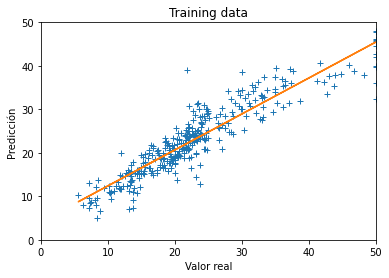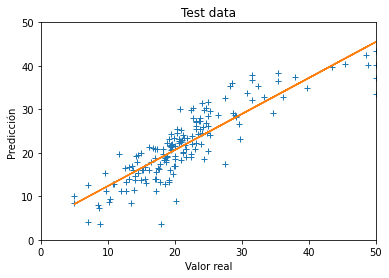

MSE medio en training: 13.549909
MSE medio en test: 18.326933

El modelo con 200 Neuronas es el de mejor ajuste de los 3. Este modelo a pesar de incrementar la complejidad con mas neuronas no overfitea segun los resultados de train y test. Se puede observar a simple vista que el ajuste de la regla a los datos es visualmente mayor vs los otros modelos.